In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import timeit
from utils import *

In [2]:
def visualize(re):
    """
    绘制四种算法的运行时间比较图
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(6, 6), dpi=80)
    # 在图形框里只画一幅图
    ax = fig.add_subplot(111)
    ax.set_xlabel("num")
    ax.set_ylabel("run_time")
    ax.plot(re["num"], re["gd"], "k", label="%s" % "GD")
    ax.plot(re["num"], re["sgd"], "r-.", label="%s" % "SGD")
    ax.plot(re["num"], re["momentum"], "b--", label="%s" % "Momentum")
    ax.plot(re["num"], re["adam"], "g:", label="%s" % "Adam")
    legend = plt.legend(shadow=True)
    plt.show()

In [3]:
def compare_with_diff_size():
    """
    在不同数据量下，使用两种算法对同一模型做估计
    """
    re = {
        "num": [],
        "gd": [],
        "sgd": [],
        "momentum": [],
        "adam": []
    }
    dimension = 10
    for i in range(1, 10):
        # 重置tensorflow
        tf.reset_default_graph()
        model = create_linear_model(dimension)
        num = 4000 * i
        re["num"].append(num)
        X, Y = generate_linear_data(dimension, num)
        # 使用梯度下降法估计模型
        start_time = timeit.default_timer()
        gradient_descent(X, Y, model)
        end_time = timeit.default_timer()
        gd_time = end_time - start_time
        re["gd"].append(gd_time)
        # 使用随机梯度下降法估计模型
        start_time = timeit.default_timer()
        method = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        stochastic_gradient_descent(X, Y, model, method)
        end_time = timeit.default_timer()
        sgd_time = end_time - start_time
        re["sgd"].append(sgd_time)
        # 使用momentum估计模型
        start_time = timeit.default_timer()
        method = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
        stochastic_gradient_descent(X, Y, model, method)
        end_time = timeit.default_timer()
        momentum_time = end_time - start_time
        re["momentum"].append(momentum_time)
        # 使用Adam估计模型
        start_time = timeit.default_timer()
        method = tf.train.AdamOptimizer(learning_rate=0.1)
        stochastic_gradient_descent(X, Y, model, method)
        end_time = timeit.default_timer()
        adam_time = end_time - start_time
        re["adam"].append(adam_time)
    return re

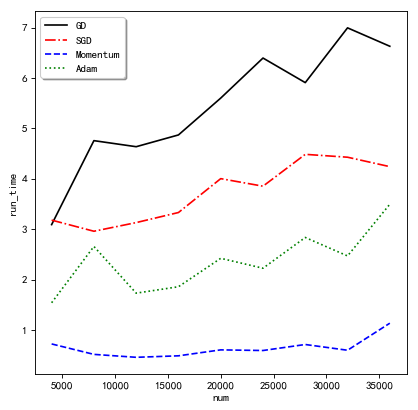

In [4]:
visualize(compare_with_diff_size())